In [1]:
%pylab inline
import pandas
import px4tools
import scipy.integrate

Populating the interactive namespace from numpy and matplotlib
attempting to monkey patch pandas timedelta series plotting
monkey patch suceeded


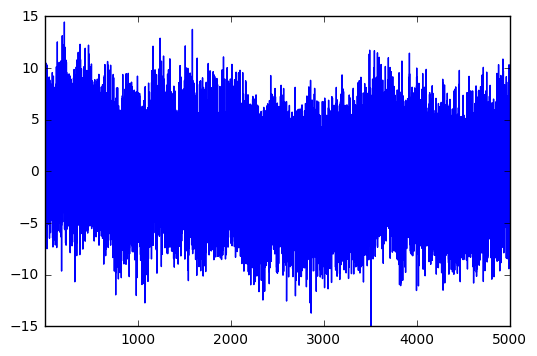

In [2]:
tau = 300
def f(t, y, u):
    return -1/tau*y[0] + u
sim = scipy.integrate.ode(f)
sim.set_initial_value(1)
dt_sample = 0.1
data = {'y': [], 't': []}
sigma_gyro_bias = 1
sima_gyro_noise = 1
while sim.t < 5000:
    sim.set_f_params(np.random.randn()*sqrt(2/dt_sample*sigma_gyro_bias**2/tau))
    sim.integrate(sim.t + dt_sample)
    data['t'] += [sim.t]
    data['y'] += [sim.y + sima_gyro_noise*np.random.randn()/sqrt(dt_sample)]
for key in data.keys():
    data[key] = np.array(data[key]).reshape(-1)
data = pandas.Series(data=data['y'], index=data['t'])
data.plot()

{'sig_bi': 0.62357014091622176,
 'sig_rrw': 0.05955865788182927,
 'sig_rw': 0.88411149277327139,
 'tau_0': 0.80714762025612319,
 'tau_1': 25.711224522170809,
 'tau_2': 819.01631106799118}

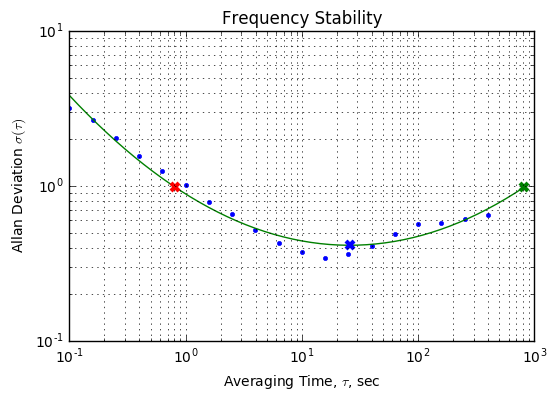

In [3]:
#dt_sample = 0.1
#tau = 500
#x = np.arange(0, 5000, dt_sample)
    
#y = 1*np.exp(-x/tau) + 1*np.random.randn(len(x))
#data = pandas.Series(data=y, index=x)
px4tools.ulog.plot_allan_std_dev(data, dt_sample)

1135.4600654580095

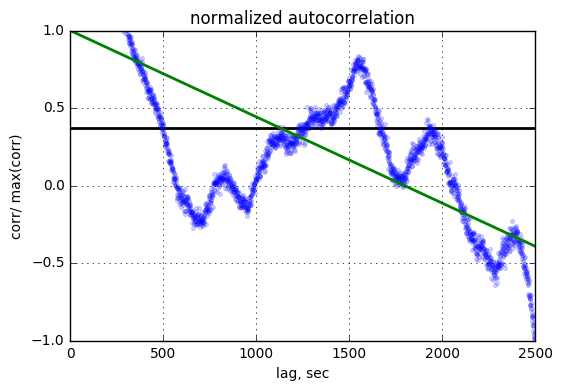

In [4]:
px4tools.ulog.plot_autocorrelation(data, dt_sample)